## Comparing inter-attribute logical dependencies of synthetic data generated by state-of-the art generative models with respect to the real data
- Load real data and synthetic data generated by seven generative models
- Apply Q_function on real and synthetic data to check the inter-attribute logical dependencies (only for categorical features)
- Extract inter-attribute logical dependencies of real and synthetic data based on Q_scores
- If Q_score for a perticular pair of features is 0 then those features are functionally dependent, if Q_score is 1 then they are independent of each other and if Q_scores lies between 0 and 1 then those feature pairs are logically dependent
- All the functions related to this notebook are in the file Functions.py 

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import entropy
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from Functions import *

## Real_data

In [60]:
data = pd.read_csv('Real_datasets/Migraine.csv')
data = data.drop(['Phonophobia','Photophobia'],axis=1)
## These two features are haevily imbalanced hence removing them in the real data (later also removed in synthetic data)

In [61]:
data['Nausea'].value_counts()

Nausea
1    376
0      1
Name: count, dtype: int64

In [62]:
data['Paresthesia'].value_counts()

Paresthesia
0    374
1      3
Name: count, dtype: int64

In [63]:
data = data.drop(['Nausea','Paresthesia'],axis=1)

In [64]:
data['Type'].value_counts()

Type
0    241
1     60
2     24
3     20
4     18
5     14
Name: count, dtype: int64

In [65]:
## Paresthesia is heavily imbalanced in real data (374,3) hence the synthetic data generated by nextconvgen and tvae hassame values for the entire column
## Nausea is heavily imbalanced in real data (376,1), hence tabddpm generated same values for the whole column, but nextconvgen and ctgan is well captured this imbalance
## Exclude such features to extract dependencies to make comparsion with different models

categorical_features = ["Location", "Character", "Dysphasia", "Vertigo", "Tinnitus", "Sensory",  "Hypoacusis", "Diplopia", "Defect", "Conscience",  "DPF", 
"Duration", "Frequency", "Intensity", "Visual", "Vomit", "Type"]

In [66]:
check_categories(data, categorical_features)

There are no features with same entries


In [67]:
migraine_FD_data = data[categorical_features] 
migraine_FD_data.to_csv('FDTool_data/Migraine/migraine_FD_data.csv',index=False)

### If any duplicate entries in the synthetic data remove them

## Synthetic_data generated by CTGAN

In [68]:
ctgan_syn_data = pd.read_csv('Synthetic_datasets/CTGAN/synthetic_migraine_ctgan.csv')
ctgan_syn_data = ctgan_syn_data.drop(['Phonophobia','Photophobia'],axis=1)
data.shape, ctgan_syn_data.shape

((377, 18), (377, 20))

In [69]:
migraine_ctgan_FD_data = ctgan_syn_data[categorical_features] 
migraine_ctgan_FD_data.to_csv('FDTool_data/Migraine/migraine_ctgan_FD_data.csv',index=False)

In [70]:
check_categories(ctgan_syn_data, categorical_features)

There are no features with same entries


## Synthetic_data generated by CTABGAN

In [71]:
ctabgan_syn_data = pd.read_csv('Synthetic_datasets/CTABGAN/synthetic_migraine_ctabgan.csv')
ctabgan_syn_data = ctabgan_syn_data.drop(['Phonophobia','Photophobia'],axis=1)
data.shape, ctabgan_syn_data.shape

((377, 18), (377, 20))

In [72]:
migraine_ctabgan_FD_data = ctabgan_syn_data[categorical_features] 
migraine_ctabgan_FD_data.to_csv('FDTool_data/Migraine/migraine_ctabgan_FD_data.csv',index=False)

In [73]:
check_categories(ctabgan_syn_data, categorical_features)

There are no features with same entries


## Synthetic_data generated by CTABGAN+

In [74]:
ctabgan_plus_syn_data = pd.read_csv('Synthetic_datasets/CTABGAN+/synthetic_migraine_ctabgan+.csv')
ctabgan_plus_syn_data = ctabgan_plus_syn_data.drop(['Phonophobia','Photophobia'],axis=1)
data.shape, ctabgan_plus_syn_data.shape

((377, 18), (377, 20))

In [75]:
migraine_ctabgan_plus_FD_data = ctabgan_plus_syn_data[categorical_features] 
migraine_ctabgan_plus_FD_data.to_csv('FDTool_data/Migraine/migraine_ctabgan_plus_FD_data.csv',index=False)

In [76]:
check_categories(ctabgan_plus_syn_data, categorical_features)

There are no features with same entries


## Synthetic_data generated by TVAE

In [77]:
tvae_syn_data = pd.read_csv('Synthetic_datasets/TVAE/synthetic_migraine_tvae.csv')
tvae_syn_data = tvae_syn_data.drop(['Phonophobia','Photophobia'],axis=1)
tvae_syn_data = tvae_syn_data.drop_duplicates()
data.shape, tvae_syn_data.shape

((377, 18), (222, 20))

In [78]:
migraine_tvae_FD_data = tvae_syn_data[categorical_features] 
migraine_tvae_FD_data.to_csv('FDTool_data/Migraine/migraine_tvae_FD_data.csv',index=False)

In [79]:
check_categories(tvae_syn_data, categorical_features)

For column Location
1
For column Character
1
For column Dysphasia
1
For column Vertigo
1
For column Tinnitus
1
For column Sensory
1
For column Hypoacusis
1
For column Diplopia
1
For column Defect
1
For column Conscience
1
There are no features with same entries


In [80]:
same_value_features = ['Location','Character','Dysphasia','Vertigo','Tinnitus','Sensory','Hypoacusis','Diplopia','Defect','Conscience']
#Tvae generated same values for the above features

In [81]:
tvae_features = [feature for feature in categorical_features if feature not in same_value_features]
tvae_features

['DPF', 'Duration', 'Frequency', 'Intensity', 'Visual', 'Vomit', 'Type']

## Synthetic_data generated by NextConvGeN

In [82]:
nextconvgen_syn_data = pd.read_csv('Synthetic_datasets/NextConvGeN/synthetic_migraine_nextconvgen.csv')
nextconvgen_syn_data = nextconvgen_syn_data.drop(['Phonophobia','Photophobia'],axis=1)
nextconvgen_syn_data = nextconvgen_syn_data.drop_duplicates()
data.shape, nextconvgen_syn_data.shape

((377, 18), (358, 20))

In [83]:
migraine_nextconvgen_FD_data = nextconvgen_syn_data[categorical_features] 
migraine_nextconvgen_FD_data.to_csv('FDTool_data/Migraine/migraine_nextconvgen_FD_data.csv',index=False)

In [84]:
check_categories(nextconvgen_syn_data, categorical_features)

There are no features with same entries


## Synthetic_data generated by TabDDPM

In [85]:
tabddpm_syn_data = pd.read_csv('Synthetic_datasets/TabDDPM/synthetic_migraine_tabddpm.csv')
tabddpm_syn_data = tabddpm_syn_data.drop(['Phonophobia','Photophobia'],axis=1)
tabddpm_syn_data = tabddpm_syn_data.drop_duplicates()
tabddpm_syn_data = tabddpm_syn_data.sample(n=data.shape[0],random_state=42,ignore_index=True)
data.shape, tabddpm_syn_data.shape

((377, 18), (377, 20))

In [86]:
migraine_tabddpm_FD_data = tabddpm_syn_data[categorical_features] 
migraine_tabddpm_FD_data.to_csv('FDTool_data/Migraine/migraine_tabddpm_FD_data.csv',index=False)

In [87]:
check_categories(tabddpm_syn_data, categorical_features)

There are no features with same entries


## Synthetc data generated by TabuLa

In [88]:
tabula_syn_data = pd.read_csv('Synthetic_datasets/TabuLa/synthetic_migraine_tabula.csv')
tabula_syn_data.duplicated().sum()

78

In [89]:
tabula_syn_data.shape

(377, 22)

In [90]:
tabula_syn_data = tabula_syn_data.drop_duplicates()
tabula_syn_data.duplicated().sum()

0

In [91]:
data.shape

(377, 18)

In [92]:
check_categories(tabula_syn_data, categorical_features)

For column Diplopia
1
There are no features with same entries


In [93]:
data['Diplopia'].value_counts()

Diplopia
0    375
1      2
Name: count, dtype: int64

In [94]:
migraine_tabula_FD_data = tabula_syn_data[categorical_features] 
migraine_tabula_FD_data.to_csv('FDTool_data/Migraine/migraine_tabula_FD_data.csv',index=False)

## Q_score calculation for real and synthetic data
- Identify logical dependencies in real and synthetic data using Q_metric function and compare whether they are same or not
- For each feature pair we will get Q_scores for both real and syntehtic. Plot them using feature_pair_plot function to see the common dependencies (located on diagonal line)
### Q_scores of real data
- Q_metric_real variable contains the list of Q_metric scores for each pair of features
- Snice I have 17 categorical features in my data set, the total number of feature pairs are 272 

In [95]:
Q_metric_real = Q_metric(data, categorical_features)

Functional dependency: Location -> Character
Functional dependency: Character -> Location
Functional dependency: Intensity -> Location
Functional dependency: Intensity -> Character
Functional dependency: Type -> Location
Functional dependency: Type -> Character
There are some logical dependencies in the data.


In [96]:
len(Q_metric_real)

272

## Histogram of Q_scores for real data
- For any given data distibution of Q_scores helps in identifying the presence of logical and functional dependencies

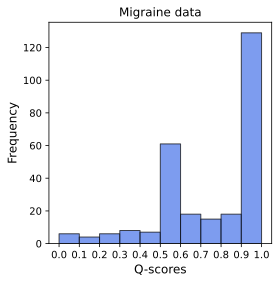

In [97]:
## defining colors
custom_palette = {
    0: (70/255, 114/255, 232/255),   # GoogleBlue
    1: (76/255, 150/255, 77/255),     # GoogleGreen
    2: (238/255, 179/255, 62/255)     # GoogleOrange
}

# Specify the bin edges to include values from 0.0 to 1.0
bin_edges = np.arange(0.0, 1.1, 0.1)

Q_metric_real = [round(value, 2) for value in Q_metric_real]
# Create a histogram with custom bin edges

# Set the figure size
plt.figure(figsize=(4, 4))  # Adjust width and height as needed

plt.hist(Q_metric_real, bins=bin_edges, edgecolor='black',align='mid',color=custom_palette[0],alpha=0.7)

# Add labels and title
plt.xlabel('Q-scores',fontname='DejaVu Sans', fontsize=12)
plt.ylabel('Frequency',fontname='DejaVu Sans', fontsize=12)
plt.title('Migraine data',fontname='DejaVu Sans', fontsize=12)

# Set x-axis ticks to include values from 0.0 to 1.0
plt.xticks(bin_edges)

# Show the plot
#plt.savefig('migraine.png', dpi=300, bbox_inches='tight')
plt.show()


In [98]:
data['Type'].value_counts() #Diagnosis of migraine type

Type
0    241
1     60
2     24
3     20
4     18
5     14
Name: count, dtype: int64

In [99]:
data['Location'].value_counts() # unilateral or biltera pain

Location
1    357
0     20
Name: count, dtype: int64

In [100]:
CP = data.groupby('Type')['Location'].value_counts(normalize=True).unstack()
CP = CP.fillna(0)
CP

Location,0,1
Type,,
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
5,0.0,1.0


In [101]:
Q_score = Q_metric(data[['Type','Location']],['Type','Location'])

Functional dependency: Type -> Location
There are some logical dependencies in the data.


In [102]:
Q_score

[0.0, 0.4]

In [103]:
CP = data.groupby('Location')['Type'].value_counts(normalize=True).unstack()
CP = CP.fillna(0)
CP

Type,0,1,2,3,4,5
Location,,,,,,
0,0.00000,0.000000,0.000000,1.0,0.00000,0.000000
1,0.67507,0.168067,0.067227,0.0,0.05042,0.039216


## Q_scores of synthetic data generated by CTGAN 

In [104]:
Q_metric_ctgan = Q_metric(ctgan_syn_data, categorical_features)

There are no functional dependencies in the data.
There are some logical dependencies in the data.


KL Divergence score is: 1.9471583683927889


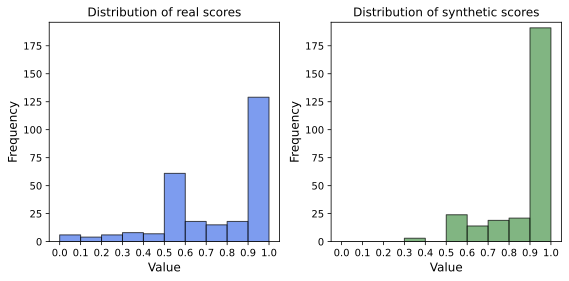

In [105]:
plot_scores(Q_metric_real,Q_metric_ctgan)

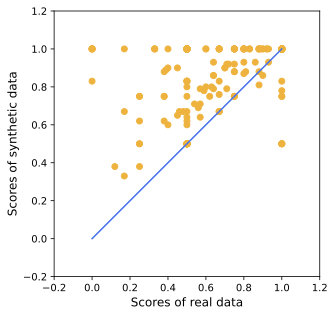

In [106]:
feature_pair_plot(Q_metric_real, Q_metric_ctgan)

## Q_scores of synthetic data genearted by CTABGAN 

In [107]:
Q_metric_ctabgan = Q_metric(ctabgan_syn_data, categorical_features)

There are no functional dependencies in the data.
There are no logical dependencies in the data.


KL Divergence score is: 12.205643326363028


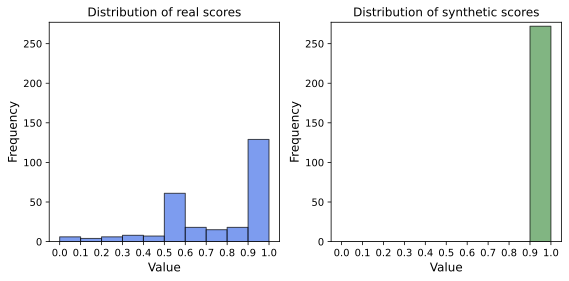

In [108]:
plot_scores(Q_metric_real,Q_metric_ctabgan)

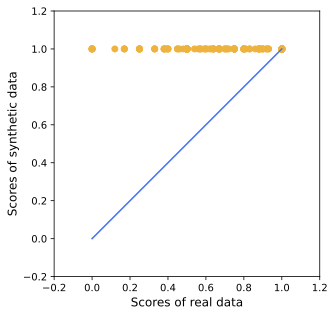

In [109]:
feature_pair_plot(Q_metric_real, Q_metric_ctabgan)

## Q_scores of synthetic data genearted by CTABGAN+

In [110]:
Q_metric_ctabgan_plus = Q_metric(ctabgan_plus_syn_data, categorical_features)

There are no functional dependencies in the data.
There are some logical dependencies in the data.


KL Divergence score is: 1.1508225254698183


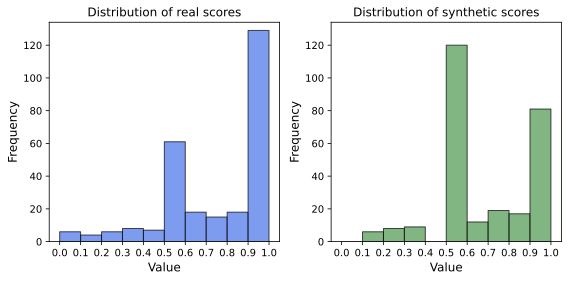

In [111]:
plot_scores(Q_metric_real,Q_metric_ctabgan_plus)

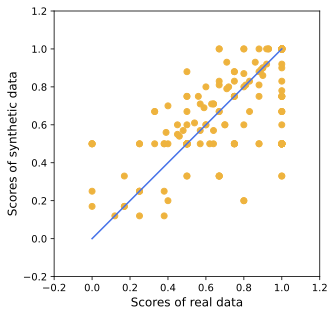

In [112]:
feature_pair_plot(Q_metric_real, Q_metric_ctabgan_plus)

## Q_scores of synthetic data genearted by TVAE

In [113]:
Q_metric_tvae = Q_metric(tvae_syn_data, categorical_features)

Location Character
Functional dependency: Location -> Character
Location Dysphasia
Functional dependency: Location -> Dysphasia
Location Vertigo
Functional dependency: Location -> Vertigo
Location Tinnitus
Functional dependency: Location -> Tinnitus
Location Sensory
Functional dependency: Location -> Sensory
Location Hypoacusis
Functional dependency: Location -> Hypoacusis
Location Diplopia
Functional dependency: Location -> Diplopia
Location Defect
Functional dependency: Location -> Defect
Location Conscience
Functional dependency: Location -> Conscience
Character Location
Functional dependency: Character -> Location
Character Dysphasia
Functional dependency: Character -> Dysphasia
Character Vertigo
Functional dependency: Character -> Vertigo
Character Tinnitus
Functional dependency: Character -> Tinnitus
Character Sensory
Functional dependency: Character -> Sensory
Character Hypoacusis
Functional dependency: Character -> Hypoacusis
Character Diplopia
Functional dependency: Character 

Vomit Diplopia
Functional dependency: Vomit -> Diplopia
Vomit Defect
Functional dependency: Vomit -> Defect
Vomit Conscience
Functional dependency: Vomit -> Conscience
Type Location
Functional dependency: Type -> Location
Type Character
Functional dependency: Type -> Character
Type Dysphasia
Functional dependency: Type -> Dysphasia
Type Vertigo
Functional dependency: Type -> Vertigo
Type Tinnitus
Functional dependency: Type -> Tinnitus
Type Sensory
Functional dependency: Type -> Sensory
Type Hypoacusis
Functional dependency: Type -> Hypoacusis
Type Diplopia
Functional dependency: Type -> Diplopia
Type Defect
Functional dependency: Type -> Defect
Type Conscience
Functional dependency: Type -> Conscience
There are some logical dependencies in the data.


In [114]:
len(Q_metric_tvae)

272

KL Divergence score is: 1.2938658875629918


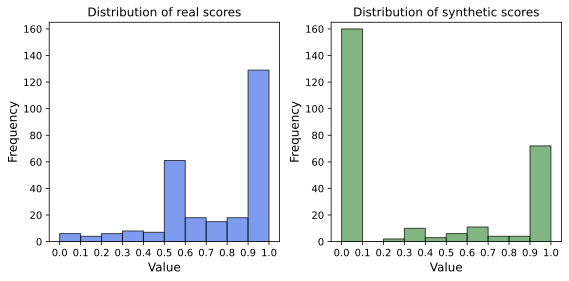

In [115]:
plot_scores(Q_metric_real,Q_metric_tvae)

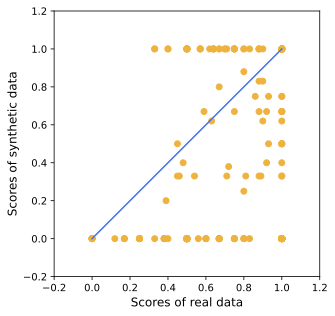

In [116]:
feature_pair_plot(Q_metric_real, Q_metric_tvae)

## Q_scores of synthetic data genearted by NextConvGen

In [117]:
Q_metric_nextconvgen = Q_metric(nextconvgen_syn_data, categorical_features)

Functional dependency: Location -> Character
Functional dependency: Character -> Location
Functional dependency: Intensity -> Location
Functional dependency: Intensity -> Character
Functional dependency: Type -> Location
Functional dependency: Type -> Character
There are some logical dependencies in the data.


KL Divergence score is: 0.0768301586603063


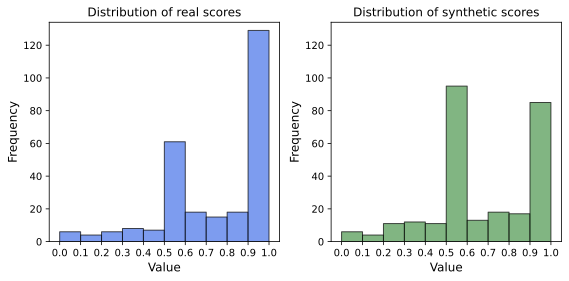

In [118]:
plot_scores(Q_metric_real,Q_metric_nextconvgen)

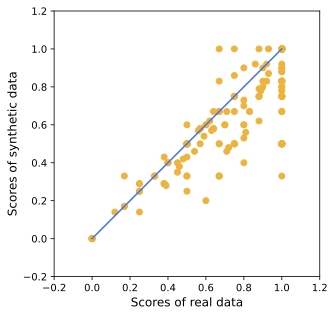

In [119]:
feature_pair_plot(Q_metric_real, Q_metric_nextconvgen)

## Q_scores of synthetic data genearted by TabDDPM

In [120]:
Q_metric_tabddpm = Q_metric(tabddpm_syn_data, categorical_features)

Functional dependency: Location -> Character
Functional dependency: Character -> Location
Functional dependency: Intensity -> Location
Functional dependency: Intensity -> Character
Functional dependency: Type -> Location
Functional dependency: Type -> Character
There are some logical dependencies in the data.


KL Divergence score is: 0.034514038861521656


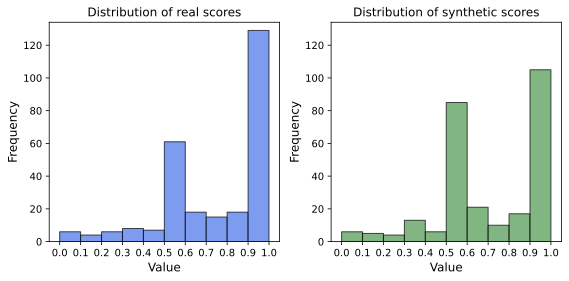

In [121]:
plot_scores(Q_metric_real,Q_metric_tabddpm)

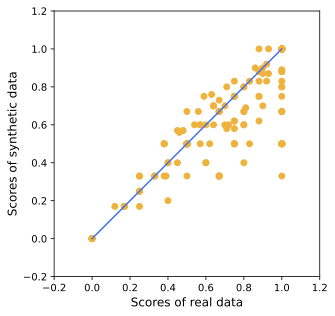

In [122]:
feature_pair_plot(Q_metric_real, Q_metric_tabddpm)

## Q_scores of synthetic data genearted by TabuLa

In [123]:
Q_metric_tabula = Q_metric(tabula_syn_data, categorical_features)

Functional dependency: Location -> Character
Location Diplopia
Functional dependency: Location -> Diplopia
Functional dependency: Character -> Location
Character Diplopia
Functional dependency: Character -> Diplopia
Dysphasia Diplopia
Functional dependency: Dysphasia -> Diplopia
Vertigo Diplopia
Functional dependency: Vertigo -> Diplopia
Tinnitus Diplopia
Functional dependency: Tinnitus -> Diplopia
Sensory Diplopia
Functional dependency: Sensory -> Diplopia
Hypoacusis Diplopia
Functional dependency: Hypoacusis -> Diplopia
Defect Diplopia
Functional dependency: Defect -> Diplopia
Conscience Diplopia
Functional dependency: Conscience -> Diplopia
DPF Diplopia
Functional dependency: DPF -> Diplopia
Duration Diplopia
Functional dependency: Duration -> Diplopia
Frequency Diplopia
Functional dependency: Frequency -> Diplopia
Intensity Diplopia
Functional dependency: Intensity -> Diplopia
Visual Diplopia
Functional dependency: Visual -> Diplopia
Vomit Diplopia
Functional dependency: Vomit -> D

KL Divergence score is: 0.03518290817989791


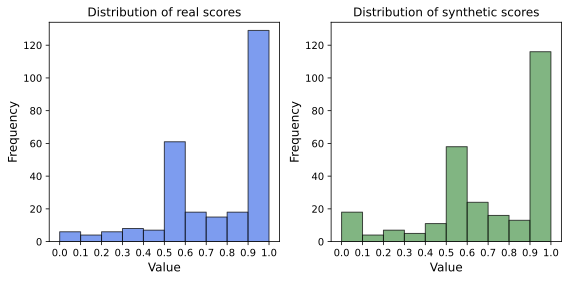

In [124]:
plot_scores(Q_metric_real,Q_metric_tabula)

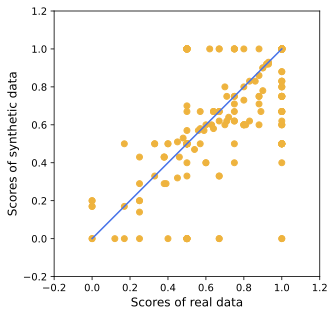

In [125]:
feature_pair_plot(Q_metric_real, Q_metric_tabula)

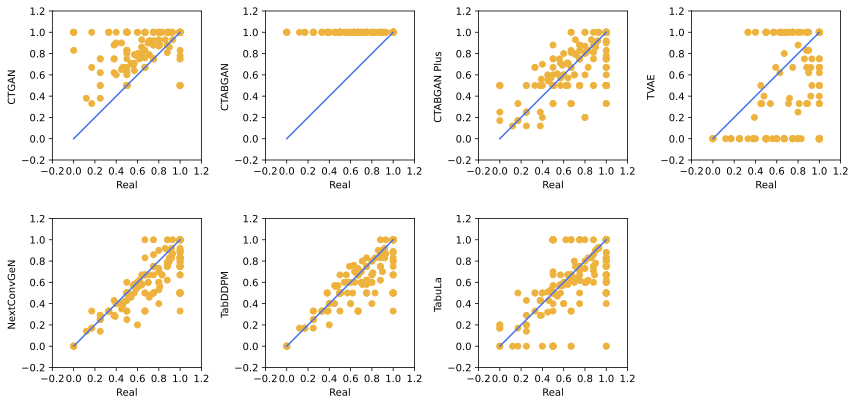

In [126]:
synthetic_data_lists = [Q_metric_ctgan, Q_metric_ctabgan, Q_metric_ctabgan_plus, Q_metric_tvae, Q_metric_nextconvgen, Q_metric_tabddpm, Q_metric_tabula]
feature_pair_plot_all(Q_metric_real, synthetic_data_lists)

## Comparing logical dependencies of real and synthetic data

## CTGAN

In [127]:
df_zero_ctgan, df_one_ctgan, real_dependencies, total_count, ctgan_match = common_dependencies(data,ctgan_syn_data, categorical_features)

Total number of logical dependencies in real data are: 676
Total number of logical dependencies in synthetic data data are: 242
The pecentange of dependencies preserved in synthetic data is : 35.798816568047336


## CTABGAN

In [128]:
df_zero_ctabgan, df_one_ctabgan, real_dependencies, total_count, ctabgan_match = common_dependencies(data,ctabgan_syn_data, categorical_features)

Total number of logical dependencies in real data are: 676
Total number of logical dependencies in synthetic data data are: 0
The pecentange of dependencies preserved in synthetic data is : 0.0


## CTABGAN+

In [129]:
df_zero_ctabgan_plus, df_one_ctabgan_plus, real_dependencies, total_count, ctabgan_plus_match = common_dependencies(data,ctabgan_plus_syn_data, categorical_features)

Total number of logical dependencies in real data are: 676
Total number of logical dependencies in synthetic data data are: 420
The pecentange of dependencies preserved in synthetic data is : 62.1301775147929


## TVAE

In [130]:
df_zero_tvae, df_one_tvae, real_dependencies, total_count, tvae_match = common_dependencies(data,tvae_syn_data, categorical_features)

Total number of logical dependencies in real data are: 676
Total number of logical dependencies in synthetic data data are: 87
The pecentange of dependencies preserved in synthetic data is : 12.8698224852071


## NextConvGeN

In [131]:
df_zero_nextconvgen, df_one_nextconvgen, real_dependencies, total_count, nextconvgen_match = common_dependencies(data,nextconvgen_syn_data, categorical_features)

Total number of logical dependencies in real data are: 676
Total number of logical dependencies in synthetic data data are: 584
The pecentange of dependencies preserved in synthetic data is : 86.3905325443787


## TabDDPM

In [132]:
df_zero_tabddpm, df_one_tabddpm, real_dependencies, total_count, tabddpm_match = common_dependencies(data,tabddpm_syn_data, categorical_features)

Total number of logical dependencies in real data are: 676
Total number of logical dependencies in synthetic data data are: 547
The pecentange of dependencies preserved in synthetic data is : 80.9171597633136


## TabuLa

In [133]:
df_zero_tabula, df_one_tabula, real_dependencies, total_count, tabula_match = common_dependencies(data,tabula_syn_data, categorical_features)

Total number of logical dependencies in real data are: 676
Total number of logical dependencies in synthetic data data are: 481
The pecentange of dependencies preserved in synthetic data is : 71.15384615384616
